# Savings accounts
based on their banking behavior. We can take following things into consideration as banking behavior:
do they have savings account? How much do they save?

In [30]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
accounts_df = pd.read_csv('./data/mini-project-III/twm_accounts.csv' , delimiter=';')
savings_acct_df = pd.read_csv('./data/mini-project-III/twm_savings_acct.csv' , delimiter=';')
savings_tran_df = pd.read_csv('./data/mini-project-III/twm_savings_tran.csv' , delimiter=';')

In [32]:
def print_some_info(df):
    print("Customers columns: ",df.columns)
    print("Customers columns: ",len(df.columns))
    print("Customers rows: ",len(df))

In [33]:
print_some_info(savings_acct_df)
savings_acct_df.head()

Customers columns:  Index(['cust_id', 'acct_nbr', 'minimum_balance', 'acct_type', 'account_active',
       'acct_start_date', 'acct_end_date', 'starting_balance',
       'ending_balance'],
      dtype='object')
Customers columns:  9
Customers rows:  421


,cust_id,acct_nbr,minimum_balance,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,1363160,13631603,100,BS,Y,9.5.1988,NaN,113.04,122.54
1,1362487,13624873,500,MM,N,27.6.1994,25.8.1995,651.73,12.89
2,1362548,13625483,100,BS,Y,11.11.1986,NaN,250.24,254.02
3,1362752,13627523,100,BS,Y,20.2.1995,NaN,600.26,609.33
4,1363017,13630173,100,BS,N,27.4.1994,31.10.1995,2011.02,2901.35


In [34]:
# Keep only active accounts
filter = savings_acct_df['account_active'] == 'Y '
savings_acct_df[filter]
savings_accounts = savings_acct_df[filter].copy()

In [35]:
savings_accounts = savings_accounts.drop(['minimum_balance', 'account_active', 'acct_start_date','acct_end_date' ], axis=1)

In [38]:
savings_accounts.describe()

,cust_id,acct_nbr,starting_balance,ending_balance
count,3.750000e+02,3.750000e+02,375.000000,375.000000
mean,1.362982e+06,1.362983e+07,928.019627,1302.989333
std,2.951131e+02,2.951131e+03,1790.311934,2144.665831
min,1.362480e+06,1.362480e+07,100.240000,2.740000
25%,1.362719e+06,1.362719e+07,183.900000,259.820000
50%,1.362973e+06,1.362973e+07,318.670000,653.580000
75%,1.363252e+06,1.363252e+07,767.100000,1541.840000
max,1.363495e+06,1.363495e+07,17303.420000,22432.780000


In [39]:
savings_accounts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375 entries, 0 to 420
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           375 non-null    int64  
 1   acct_nbr          375 non-null    int64  
 2   acct_type         375 non-null    object 
 3   starting_balance  375 non-null    float64
 4   ending_balance    375 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 17.6+ KB


In [40]:
# Check for nulls in customers table
total = savings_accounts.isna().sum().sort_values(ascending=False)
percent = (savings_accounts.isna().sum()/savings_accounts.isna().sum()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
ending_balance,0,NaN
starting_balance,0,NaN
acct_type,0,NaN
acct_nbr,0,NaN
cust_id,0,NaN


In [41]:
#check for dupes for Id
idsUnique = len(set(savings_accounts.cust_id))
idsTotal = savings_accounts.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)

0


In [43]:
savings_accounts.dtypes

cust_id               int64
acct_nbr              int64
acct_type            object
starting_balance    float64
ending_balance      float64
dtype: object

In [45]:
for col in savings_accounts.dtypes[savings_accounts.dtypes == 'object'].index:
    print(f"Variable: {col} unique values: ", savings_accounts[col].nunique())

Variable: acct_type unique values:  2


In [46]:
for col in savings_accounts.dtypes[savings_accounts.dtypes != 'object'].index:
    print(f"Variable: {col} unique values: ", savings_accounts[col].nunique())

Variable: cust_id unique values:  375
Variable: acct_nbr unique values:  375
Variable: starting_balance unique values:  374
Variable: ending_balance unique values:  374


In [47]:
def num_cat_variables(variable,df):
    print("Variable: ", variable)
    print(df[variable].describe())

In [49]:
#data['Item_Identifier'].describe()
for col in savings_accounts.dtypes[savings_accounts.dtypes == 'object'].index:
    num_cat_variables(col,savings_accounts)
    print("Unique values: ", savings_accounts[col].unique())
    print('')

Variable:  acct_type
count      375
unique       2
top       BS  
freq       283
Name: acct_type, dtype: object
Unique values:  ['BS  ' 'MM  ']



In [54]:
# Strip acct_type
savings_accounts['acct_type'] = savings_accounts['acct_type'].str.strip()

In [56]:
savings_accounts['acct_type'].describe()

count     375
unique      2
top        BS
freq      283
Name: acct_type, dtype: object

/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='starting_balance', ylabel='Density'>

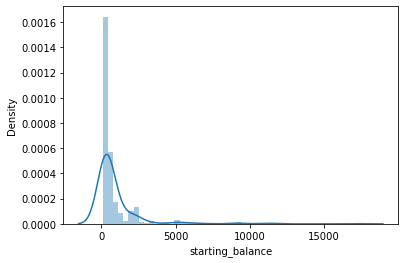

In [58]:
sns.distplot(savings_accounts["starting_balance"])

/Users/jandas/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ending_balance', ylabel='Density'>

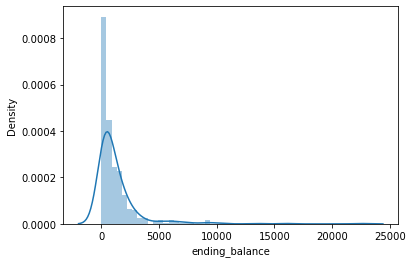

In [59]:
sns.distplot(savings_accounts["ending_balance"])

In [60]:
savings_accounts.to_csv('./data/savings_accounts_cleaned.csv')

In [2]:
import pandas as pd

In [6]:
transactions = pd.read_csv('./data/transactions_accounts.csv' , delimiter=',')

In [7]:
transactions.head() Small transactions 10 big transations 30 

,tran_id,acct_nbr,tran_amt,new_balance,tran_date,tran_time,tran_code,cust_id,starting_balance,ending_balance,acct_type
0,27,13625623,0.00,3753.34,21.10.1995,121656,IQ,1362562,391.96,3864.77,saving
1,39,13625623,140.63,3859.95,27.12.1995,170033,DP,1362562,391.96,3864.77,saving
2,2,13625623,0.49,392.94,28.2.1995,235959,IN,1362562,391.96,3864.77,saving
3,14,13625623,-120.00,2253.68,6.8.1995,204727,WD,1362562,391.96,3864.77,saving
4,26,13625623,-140.00,3753.34,21.10.1995,121543,WD,1362562,391.96,3864.77,saving


In [31]:
transactions.columns

Index(['tran_id', 'acct_nbr', 'tran_amt', 'new_balance', 'tran_date',
       'tran_time', 'tran_code', 'cust_id', 'starting_balance',
       'ending_balance', 'acct_type'],
      dtype='object')

In [ ]:
acct_nbr, tran_amt, new_balance,

In [16]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Read Files
customers_df = pd.read_csv('./data/mini-project-III/twm_customer.csv' , delimiter=';')
accounts_df = pd.read_csv('./data/mini-project-III/twm_accounts.csv' , delimiter=';')
checking_acct_df = pd.read_csv('./data/mini-project-III/twm_checking_acct.csv' , delimiter=';')
credit_acct_df = pd.read_csv('./data/mini-project-III/twm_credit_acct.csv' , delimiter=';')
savings_acct_df = pd.read_csv('./data/mini-project-III/twm_savings_acct.csv' , delimiter=';')
transactions_df = pd.read_csv('./data/mini-project-III/twm_transactions.csv' , delimiter=';')
savings_tran_df = pd.read_csv('./data/mini-project-III/twm_savings_tran.csv' , delimiter=';')
cheking_tran_df = pd.read_csv('./data/mini-project-III/twm_checking_tran.csv' , delimiter=';')
credit_tran_df = pd.read_csv('./data/mini-project-III/twm_credit_tran.csv' , delimiter=';')

In [27]:
accounts_df.columns

Index(['acct_nbr', 'cust_id', 'acct_type', 'account_active', 'acct_start_date',
       'acct_end_date', 'starting_balance', 'ending_balance'],
      dtype='object')

In [28]:
checking_acct_df.columns

Index(['cust_id', 'acct_nbr', 'minimum_balance', 'per_check_fee',
       'account_active', 'acct_start_date', 'acct_end_date',
       'starting_balance', 'ending_balance'],
      dtype='object')

In [29]:
savings_acct_df.columns

Index(['cust_id', 'acct_nbr', 'minimum_balance', 'acct_type', 'account_active',
       'acct_start_date', 'acct_end_date', 'starting_balance',
       'ending_balance'],
      dtype='object')

In [30]:
credit_acct_df.columns

Index(['cust_id', 'acct_nbr', 'credit_limit', 'credit_rating',
       'account_active', 'acct_start_date', 'acct_end_date',
       'starting_balance', 'ending_balance'],
      dtype='object')

In [45]:
len(transactions_df)

77580

In [77]:
transactions_df

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ
...,...,...,...,...,...,...,...,...,...,...
77575,77,13631752,-95.71,-95.71,0.0,95.71,14.2.1995,161001,A,TR
77576,94,13626772,-93.90,-93.90,0.0,824.36,11.3.1995,0,P,WD
77577,42,13625262,-10.35,-10.35,0.0,10.36,26.8.1995,0,P,WD
77578,98,13627052,-423.80,-423.80,0.0,162.28,13.6.1995,110209,E,WD


AttributeError: 'DataFrame' object has no attribute 'cust_id'

In [80]:
savings_tran_df

,cust_id,tran_id,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,1363481,26,136.03,136.03,0.00,1521.57,26.10.1995,84111,A,DP
1,1362746,1,2.83,0.00,2.83,2265.90,31.1.1995,235959,,IN
2,1363251,11,13.56,0.00,13.56,5438.90,30.4.1995,235959,,IN
3,1362542,4,0.76,0.00,0.76,610.92,30.4.1995,235959,,IN
4,1363387,11,148.69,148.69,0.00,470.05,21.5.1995,144736,E,DP
...,...,...,...,...,...,...,...,...,...,...
11184,1362950,10,1.68,0.00,1.68,674.90,31.10.1995,235959,,IN
11185,1362721,14,0.02,0.00,0.02,13.82,30.9.1995,235959,,IN
11186,1362806,4,3.60,0.00,3.60,1444.57,30.4.1995,235959,,IN
11187,1362995,36,541.91,541.91,0.00,4326.98,24.9.1995,150959,E,DP


In [40]:
len(credit_tran_df)

20167

In [42]:
11189 + 46204 + 20167

77560